Alpha = 0.1, Root Mean Square Error (RMSE) for testing: 0.8425032541864913


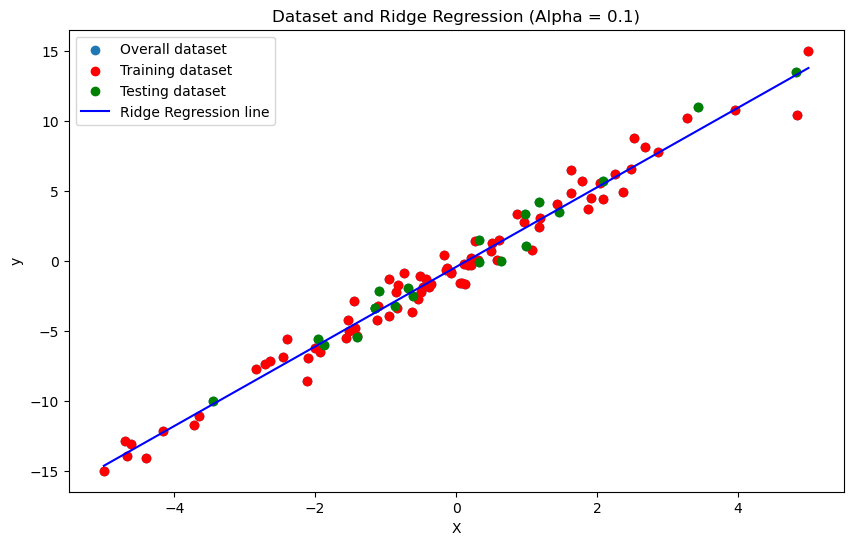

Alpha = 0.5, Root Mean Square Error (RMSE) for testing: 0.8437054735888347


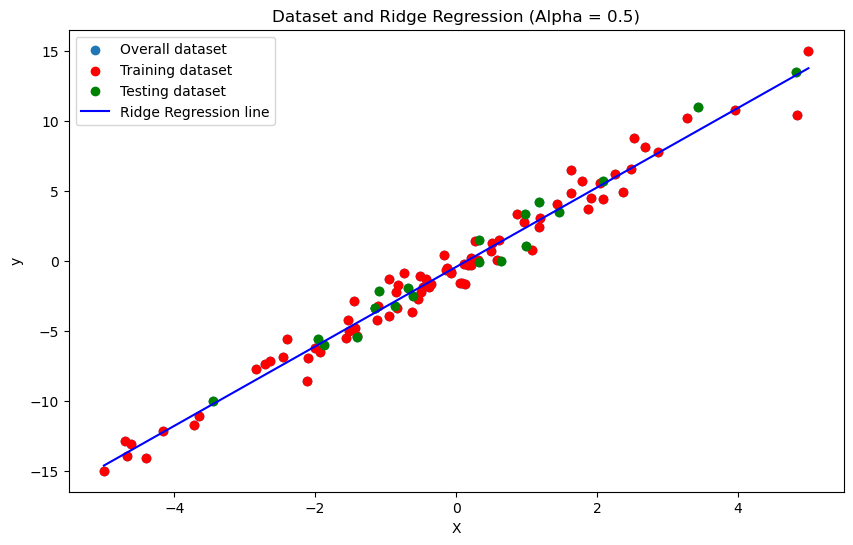

Alpha = 1.0, Root Mean Square Error (RMSE) for testing: 0.8452609495440587


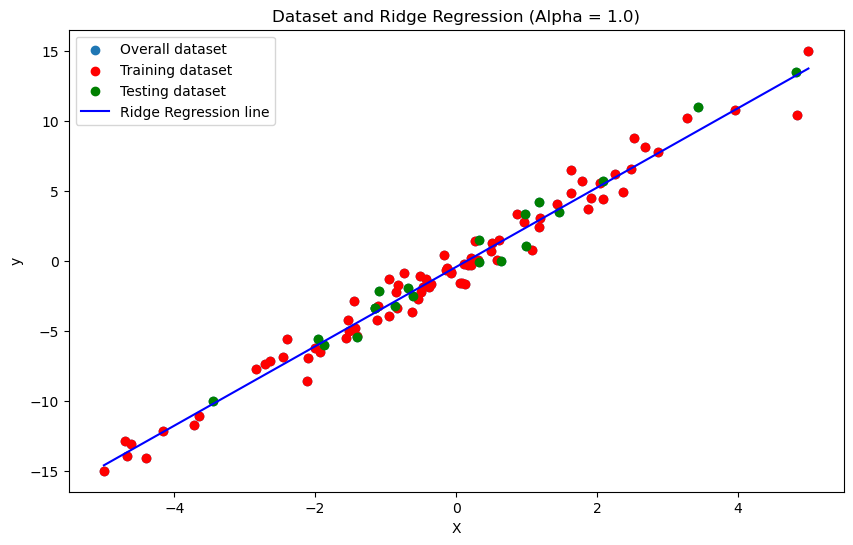

Alpha = 1.5, Root Mean Square Error (RMSE) for testing: 0.8468742031614627


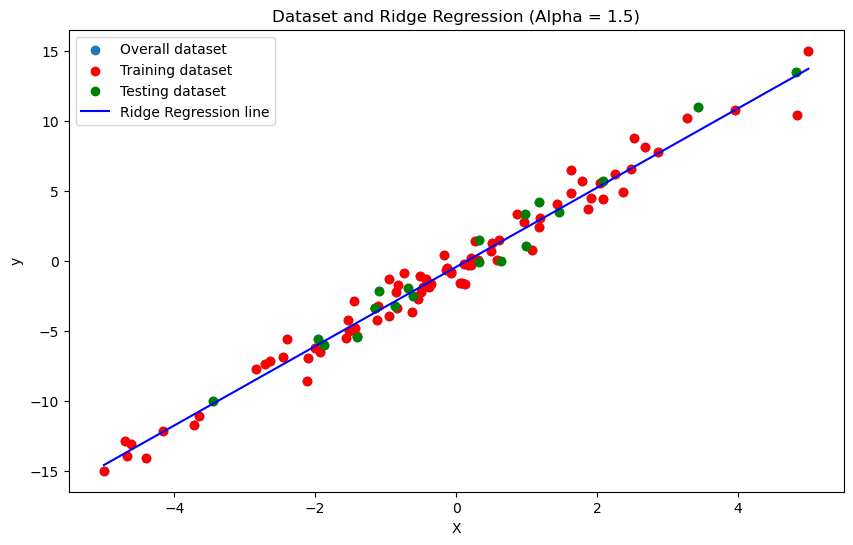

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Generate regression dataset
X, y = make_regression(n_samples=100, n_features=1, noise=5, random_state=10)

# Define range for x and y
X = np.interp(X, (X.min(), X.max()), (-5, 5))
y = np.interp(y, (y.min(), y.max()), (-15, 15))

# Reshape y to match the expected format for Ridge Regression
y = y.reshape(-1, 1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Define values of alpha (hyperparameter for Ridge Regression)
alpha_values = [0.1, 0.5, 1.0, 1.5]

# Iterate over each alpha value
for alpha in alpha_values:
    # Fit Ridge Regression model
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    
    # Predict using testing data
    y_pred_test = ridge.predict(X_test)
    
    # Calculate RMSE for testing
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    
    # Print RMSE for testing
    print(f"Alpha = {alpha}, Root Mean Square Error (RMSE) for testing:", rmse_test)
    
    # Plot the datasets and regression line for Ridge Regression
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, label='Overall dataset')
    plt.scatter(X_train, y_train, color='red', label='Training dataset')
    plt.scatter(X_test, y_test, color='green', label='Testing dataset')
    
    # Predict for the entire X range
    X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_pred_range = ridge.predict(X_range)
    
    plt.plot(X_range, y_pred_range, color='blue', label='Ridge Regression line')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title(f'Dataset and Ridge Regression (Alpha = {alpha})')
    plt.legend()
    plt.show()
